# ADS-505 Team 2 Loan Prediction Team Project
Dataset: Loan Approval Prediction Dataset [from Kaggle](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/code) \
Team Members: Ben Ogle, Roger Qiu, & Ue Wang

In [1]:
# import necessary packages
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from collections import Counter
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
import random
from sklearn.feature_selection import RFECV

# set random seed
np.random.seed(1)

2023-10-06 14:20:13.710376: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# read in loan approval df
df = pd.read_csv('loan_approval_dataset.csv')

# field names have spaces before them, trim the space
df.columns = df.columns.str.strip()

# values have spaces, trim all values:
df = df.applymap(lambda x: x.strip() if type(x) == str else x)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### EDA - Ben Ogle

### Pre-processing and modeling Part 1 - UE Wang

### Pre-Processing and modeling Part 2 - Roger Qiu

In [3]:
# read in loan approval df
df = pd.read_csv('loan_approval_dataset.csv')

# field names have spaces before them, trim the space
df.columns = df.columns.str.strip()

# values have spaces, trim all values:
df = df.applymap(lambda x: x.strip() if type(x) == str else x)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
# check nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### Pre-Processing

In [5]:
# drop the loan_id field
df = df.drop(columns = 'loan_id')
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
# check categorical values of education
df['education'].value_counts()

Graduate        2144
Not Graduate    2125
Name: education, dtype: int64

In [7]:
# convert to 1 and 0
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df.groupby('education').size()

education
0    2125
1    2144
dtype: int64

In [8]:
# check categorical values of self employed
df['self_employed'].value_counts()

Yes    2150
No     2119
Name: self_employed, dtype: int64

In [9]:
# convert to 1 and 0
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})
df.groupby('self_employed').size()

self_employed
0    2119
1    2150
dtype: int64

In [10]:
# check count of values of loan_status field
df['loan_status'].value_counts()
# balanced, dataset, no need for stratified split

Approved    2656
Rejected    1613
Name: loan_status, dtype: int64

In [11]:
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})
df.groupby('loan_status').size()

loan_status
0    1613
1    2656
dtype: int64

In [12]:
# create X and y for features and labels
X = df.drop('loan_status', axis=1)
y = df['loan_status']

print(X.head())
print(y.head())

   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          1              0       9600000     29900000   
1                 0          0              1       4100000     12200000   
2                 3          1              0       9100000     29700000   
3                 3          1              0       8200000     30700000   
4                 5          0              1       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  
0             22700

In [13]:
# split the data into a 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2988, 11)
(1281, 11)
(2988,)
(1281,)


In [14]:
# list of binary column names to not scale
binary_columns = ['education', 'self_employed']

# seperate the binary and non-binary columns
X_train_non_binary = X_train.drop(columns=binary_columns)
X_test_non_binary = X_test.drop(columns=binary_columns)
X_train_non_binary

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
3404,4,2800000,8300000,14,381,3200000,1100000,9100000,1500000
781,3,9900000,20400000,4,865,26300000,3600000,36500000,12800000
3002,4,3500000,10700000,8,883,200000,2300000,8400000,2000000
4047,3,6400000,23000000,8,520,12100000,11400000,16000000,3800000
3391,2,3300000,6700000,8,845,1300000,4600000,12300000,3200000
...,...,...,...,...,...,...,...,...,...
3444,0,1300000,4700000,16,530,3200000,1000000,3800000,800000
466,5,500000,1800000,18,411,1000000,500000,1300000,200000
3092,4,8600000,20600000,16,449,10800000,10600000,28700000,5400000
3772,2,7000000,21400000,12,541,3700000,1300000,19800000,9600000


In [15]:
scaler = StandardScaler()

# fit the scaler with training data excluding binary columns and transform both train and test data
X_train_non_binary_scaled = scaler.fit_transform(X_train_non_binary)
X_test_non_binary_scaled = scaler.transform(X_test_non_binary)
X_train_non_binary_scaled

array([[ 0.93571344, -0.80804784, -0.76001369, ..., -0.8829542 ,
        -0.66673165, -1.0707675 ],
       [ 0.3421016 ,  1.70947574,  0.57116269, ..., -0.31157915,
         2.32080181,  2.41121979],
       [ 0.93571344, -0.55984129, -0.4959787 , ..., -0.60869418,
        -0.7430555 , -0.91669727],
       ...,
       [ 0.93571344,  1.24852072,  0.59316561, ...,  1.28827099,
         1.47033608,  0.13098032],
       [-0.25151024,  0.68119146,  0.68117727, ..., -0.8372442 ,
         0.49993288,  1.42517029],
       [ 0.93571344,  0.39752683,  0.2301175 , ..., -0.28872415,
         1.03419981, -0.11553205]])

In [16]:
# add back the binary columns to the scaled data
X_train_scaled = np.concatenate([X_train_non_binary_scaled, X_train[binary_columns].values], axis=1)
X_test_scaled = np.concatenate([X_test_non_binary_scaled, X_test[binary_columns].values], axis=1)

# check the first 5 rows of the scaled training data
print(X_train_scaled[:5])

[[ 0.93571344 -0.80804784 -0.76001369  0.52634731 -1.2697434  -0.64906817
  -0.8829542  -0.66673165 -1.0707675   0.          0.        ]
 [ 0.3421016   1.70947574  0.57116269 -1.22540782  1.52250274  2.87209808
  -0.31157915  2.32080181  2.41121979  0.          1.        ]
 [ 0.93571344 -0.55984129 -0.4959787  -0.52470577  1.6263466  -1.10636249
  -0.60869418 -0.7430555  -0.91669727  1.          1.        ]
 [ 0.3421016   0.46844299  0.85720059 -0.52470577 -0.467838    0.70757164
   1.471111    0.08560342 -0.36204443  0.          0.        ]
 [-0.25151024 -0.63075745 -0.93603701 -0.52470577  1.40712067 -0.9386879
  -0.08302913 -0.31782263 -0.54692871  1.          1.        ]]


For the preprocessing phase for the second group of models, the main goal here is to clean and transform the dataset so that the models can create more accurate and reliable results for the Random Forest, Stochastic Gradient Descent and Neural Network models. Categorical fields, which can't be used directly by most models, were transformed into numerical and binary values.The "loan status" field is selected as our target field, since we are trying to predict this based on the other features or predictors in the dataset. For splitting the data to train and test the models, the dataset was split into 70/30. Finally, scaling was implemented since there are features that have vastly different scales or units such as annual income. While binary fields such as education and self-employed were already on the same scale and thus left untouched, the other features were normalized using the Standard Scaler so that no feature would highly impact or influence the model due to its size.

### Random Forest

In [17]:
# create a random forest classifier
forest_model = RandomForestClassifier()

# train model with features and labels
forest_model.fit(X_train_scaled, y_train)

# create predictions using test data
forest_y_pred = forest_model.predict(X_test_scaled)

# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_test, forest_y_pred)

# get the accuracy score by comparing predictions to the actual test values
accuracy = accuracy_score(y_test, forest_y_pred)

print("AUC score:")
print(auc_score)

print("Accuracy score:")
print(accuracy)

AUC score:
0.9785208775654636
Accuracy score:
0.9812646370023419


In [18]:
# create classification report
report = classification_report(y_test, forest_y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       471
           1       0.98      0.99      0.99       810

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



Precision is the correctly predicted positive instances to the total predicted positive labels. So a precision of .98 means that the model was correct 98% of the time it predicted the positive class. This is the amount of people that the model predicted to have aproved loans did have approvals.

Recall or sensitivity is the correctly predicted positive instances to all actual positive labels. A recall of 0.98 means that the model correctly found 98% of all actual positive approval instances. So out of all the people with approvals, the model found 98% of them.

Accuracy is .98 but AUC scores are better to get an understanding of the models trade off between true positives (recall) and false positives (1 - specificity) at each threshold.

Our AUC of .98 tells us it is a good classifier in distinguishing between positive and negative cases. The higher this score the better, an AUC of 1 is a perfect model and 0.5 is as good as a random model.

In [19]:
# create a confusion matrix
matrix = confusion_matrix(y_test, forest_y_pred)
print("Confusion matrix:")
print(matrix)

Confusion matrix:
[[456  15]
 [  9 801]]


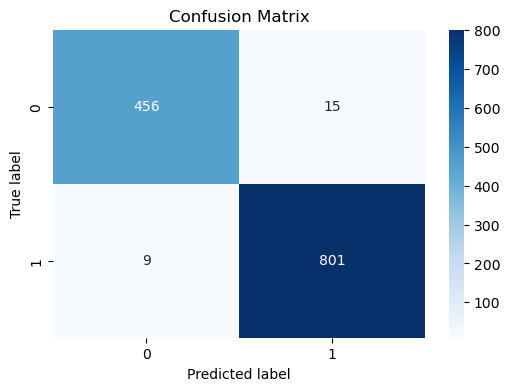

In [20]:
# create a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

# add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()

From the confusion matrix:

The top left is True Negatives, these are the instances were the model correctly predicted negative for approvals: 456

The top right is is the False Positives, where the model incorrectly predicted the positive class: 15

The bottom left is the False Negatives, the model incorrectly predicted the negative class: 9

The bottom right is the True Positives, these are the cases where the model correctly predicted the positive class: 801

In [21]:
# get feature importance
importance = forest_model.feature_importances_

# print important next to the column names
importance_series = pd.Series(importance, index=X_train.columns)
print(importance_series.sort_values(ascending=False))

loan_amount                 0.807033
income_annum                0.059038
self_employed               0.029434
education                   0.019148
residential_assets_value    0.019027
loan_term                   0.018354
cibil_score                 0.017362
commercial_assets_value     0.016733
no_of_dependents            0.008725
bank_asset_value            0.002763
luxury_assets_value         0.002382
dtype: float64


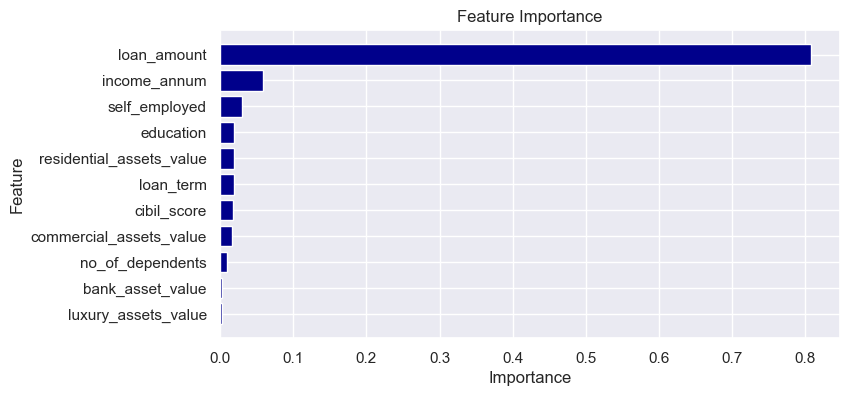

In [22]:
# sort feature importances in descending order
sorted_importances = importance_series.sort_values(ascending=False)

# create a bar plot
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,4))
plt.barh(sorted_importances.index, sorted_importances.values, color='darkblue')

# invert y-axis so that features with highest importance are at the top
plt.gca().invert_yaxis()

# add labels and title
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

Here we can see how important each feature is in determining the outcome of the predictions for the random forest model.

The Random Forest is an ensemble method that takes multiple decision trees and combines them for a more accurate and reliable prediction (Meltzer, 2023). This model achieved an AUC score of 0.9785, and an accuracy rate of 0.9812. A very useful benefit of this model is its ability to rank features by importance. Here, "loan amount" stood out as the most important feature, with a relative importance of 0.8, indicating its large influence in loan approval decisions. The next two most important features were "annual income" and the binary feature "self_employed".

### Stachastic Gradient Descent

In [23]:
from sklearn.linear_model import SGDClassifier

# create a stochastic gradient descent classifier
# use logistic regression as loss function
# L2, ridge regression, helps prevent overfitting by adding a penalty term
# optimal learning rate
# 1000 epochs or loop through the dataset 1000 times
sgd_model = SGDClassifier(loss='log', penalty='l2', learning_rate='optimal', max_iter=1000, random_state=1)

# train model with features and labels
sgd_model.fit(X_train_scaled, y_train)

# create predictions using test data
sgd_y_pred = sgd_model.predict(X_test_scaled)

# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_test, sgd_y_pred)

# get the accuracy score by comparing predictions to the actual test values
accuracy = accuracy_score(y_test, sgd_y_pred)

print("AUC score:")
print(auc_score)

print("Accuracy score:")
print(accuracy)

AUC score:
0.9105252811197609
Accuracy score:
0.9110070257611241


Next, we used a Stochastic Gradient Descent (SGD), which is a linear model that is especially useful at handling large datasets by continuously updating its parameters based on the gradient of the loss function. Unlike traditional gradient descent that calculates the gradient using the entire dataset, the SGD estimates it using a single record at a time, which is both memory efficient and computationally faster (Price, 2020). For the parameters of the SGD, log loss was used as the function since this is a binary classification that penalizes false classifications. The L2 penalty, or Ridge regularization, was used to add a penalty and to help prevent overfitting by penalizing large coefficients. The model resulted in an AUC of 0.9105 and an accuracy rate of 0.911. While less than the Random Forest, its simplicity and fast computing time could make it a preferred choice in cases where the data is extremely large or when there are limited computing resources. 

### Neural Network

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score

# create the keras model
model = Sequential()

# adding a dense layer with 12 neurons and relu activation function, input_dim is the number of features in the input dataset
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))

# adding a second hidden layer with 8 neurons and relu activation function
model.add(Dense(8, activation='relu'))

# adding the output layer with 1 neuron since it's a binary classification problem; sigmoid activation function outputs probabilities that sum to one
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
# compiling the model with binary crossentropy loss function for binary classification; 
# adam optimizer is used for minimizing the loss function
# accuracy is chosen as a metric to evaluate the model's performance
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model to the training data; 
# using 10 epochs to iterate 10 times over the dataset during training, 
# and batch_size of 10 means that the model is updated after 10 data points have been processed
model.fit(X_train_scaled, y_train, epochs=10, batch_size=10)

# create predictions using test data
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_test, y_pred)

# get the accuracy score by comparing predictions to the actual test values
accuracy = accuracy_score(y_test, y_pred)

print("AUC score:")
print(auc_score)

print("Accuracy score:")
print(accuracy)

Epoch 1/10
299/299 [==============================] - 2s 2ms/step - loss: 0.5501 - accuracy: 0.7242
Epoch 2/10
299/299 [==============================] - 1s 2ms/step - loss: 0.2837 - accuracy: 0.8942
Epoch 3/10
299/299 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9207
Epoch 4/10
299/299 [==============================] - 1s 2ms/step - loss: 0.2017 - accuracy: 0.9301
Epoch 5/10
299/299 [==============================] - 1s 2ms/step - loss: 0.1905 - accuracy: 0.9344
Epoch 6/10
299/299 [==============================] - 1s 2ms/step - loss: 0.1802 - accuracy: 0.9381
Epoch 7/10
299/299 [==============================] - 1s 2ms/step - loss: 0.1723 - accuracy: 0.9421
Epoch 8/10
299/299 [==============================] - 1s 2ms/step - loss: 0.1665 - accuracy: 0.9411
Epoch 9/10
299/299 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9428
Epoch 10/10
41/41 [==============================] - 0s 1ms/step
AUC score:
0.9234371313989149
Accur

For our final model, we created a neural network using Keras. This model was built with an input layer that matches the number of features in our dataset. Next, two hidden layers were added: the first with 12 neurons and the second with 8, both using the RELU activation function. The final layer is a single neuron and a sigmoid activation function, which outputs the probability of loan approval. During the compilation phase, the model also uses the 'adam' optimizer and 'binary cross entropy' as the loss function, which is suited for binary classification tasks like our own (Tanwar, 2022). The model was trained in 10 epochs with batches of 10 records at a time. This final model results in an AUC score of 0.9234 and an accuracy score of 0.92115, still slightly outperformed by the Random Forest.

### Hyperparameter tuning with GridSearchCV

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from keras.wrappers.scikit_learn import KerasClassifier

# set the models and their parameters to loop over
models = [
    ('Random Forest', RandomForestClassifier(random_state=42), X_train_scaled, X_test_scaled, {
        'n_estimators': [5, 50, 100, 500, 1000],
        'max_depth': [None, 5, 10, 15, 20, 50],
    }),
    ('SGD', SGDClassifier(random_state=42), X_train_scaled, X_test_scaled, {
        'loss': ['log'],
        'penalty': ['l2', 'l1'],
        'learning_rate': ['optimal'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
    })
]

# store the best models and their scores
best_models = {}
best_scores = {}
best_params = {}

For the parameters of:

Random Forest:
- estimators: number of trees in the forest, more can be more accuracy but requires more computation and possible overfitting
- depth: same as decision trees.

SGD: 
- loss: defines the loss function to be minimized during the optimization. In this case, 'log' is used for logistic regression, making the SGD classifier for binary.
- penalty: sets the the penalization for 'l2' and 'l1'. L1 pushes less important features coefficients to zero, creating feature selection, while L2 shrinks the less important features towards zero but doesn't remove them.
- learning rate: controls the step size at each iteration while moving toward a minimum of the loss function.
- alpha: the amount of regularization applied, with larger values meaning more regularization.

In [35]:
# perform Grid Search for each model, use x train and x test
# use 5 fold cross validation and then test on each generated y_train
for name, model, X_train, X_test, params in models:
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # store the best model, score, and parameters
    best_models[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_
    best_params[name] = grid_search.best_params_

In [36]:
# print the best models, scores, and parameters for each
for name in best_models:
    print(f"Best {name} model: {best_models[name]}")
    print(f"Best accuracy score: {best_scores[name]}")
    print(f"Best parameters: {best_params[name]}\n")

Best Random Forest model: RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=42)
Best accuracy score: 0.9812602589312224
Best parameters: {'max_depth': 20, 'n_estimators': 1000}

Best SGD model: SGDClassifier(alpha=0.01, loss='log', penalty='l1', random_state=42)
Best accuracy score: 0.9253710021680307
Best parameters: {'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'l1'}



Finally, we also used GridSearchCV on the Random Forest and SGD models, to find the optimal parameters that resulted in the highest accuracy. Due to computational constraints, our neural network wasn't part of this grid search. The Random Forest model outperforms the SGD model in terms of accuracy with the given dataset and parameter range explored. It achieves an accuracy of about 98.13% compared to the 92.54% of the SGD model. The best parameters for this was a max depth of 20 and using 1000 trees or estimators. 

# Results, Discussion and conclusion

The model with the highest accuracy was the decision tree, with an accuracy of 98.2%, precision of 97.78%, recall of 99.5% and an F1-score of 98.63%. This implies that tree-based models, such as the Random Forest and the Decision Tree, were the best models, in terms of accuracy for predicting loan approvals based on the given features. The Random Forest's results show how powerful ensemble models can be in finding patterns in datasets with many different features and relationships such as ours. The logistic regression models, KNN model and gradient boosting models also had impressive accuracy and could be preferred models due to their simplicity and ease of explainability in results. On the other hand, while the Neural Network's high accuracy also displays the flexibility and potential of deep learning models, results and predictions can be difficult to explain and interpret, which could be very important whether in explaining results to customers or management . It should also be noted that, at an accuracy that's not too far off, the SGD model could also be a preferred choice when the data is extremely large or if there are limited computing resources. 

Machine learning can create new innovations and transformations for financial institutions, especially banks, to update their traditional loan approval processes. Traditional methods are often time-consuming and can be prone to human biases and overlook data patterns that algorithms can accurately find (Roth, 2023). Automating the loan approval process through exploratory data analysis and predictive models, such as the ones created in this project, not only makes this decision-making process faster, leading to cost savings and higher customer satisfaction, but can also lead to lower risk of loans and higher likelihood of returns from the borrowers. 

The high accuracy of these models can ensure a very detailed risk assessment of every loan. By finding these hidden patterns in applicant data, banks can make more informed lending decisions and can discern between higher and lower risk individuals. This accuracy can reduce the likelihood of defaults and can create a higher return on investment. In summary, implementing machine learning into the traditional loan approval process can lead to faster decision making, higher efficiency, lower risk, and increased profitability for institutions such as banks.